### Lab7a:  Lab Experiment Example with Scikit-learn and MNIST dataset

Reference: http://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

Reference: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html

This tutorial illustrates the lab experiment using a
multinomial logistic regression classifier on the MNIST dataset


In [17]:
#1 import required modules
import time
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff

from sklearn.datasets import get_data_home
from joblib import Memory
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from urllib.request import urlopen

In [18]:
#2.  read the NMIST dataset
memory = Memory(get_data_home())
@memory.cache()
def fetch_mnist():
    content = urlopen(
        'https://www.openml.org/data/download/52667/mnist_784.arff').read()
    data, meta = loadarff(io.StringIO(content.decode('utf8')))
    data = data.view([('pixels', '<f8', 784), ('class', '|S1')])
    return data['pixels'], data['class']
X, y = fetch_mnist()


In [19]:
# rescale the data, use the traditional train/test split

X = X / 255.

###### NEW  Refromat the the labels to be string rather than byte arrays
y_trans = []
for i in range(len(y)):
    y_trans.append(y[i])
y = np.asarray(y_trans)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

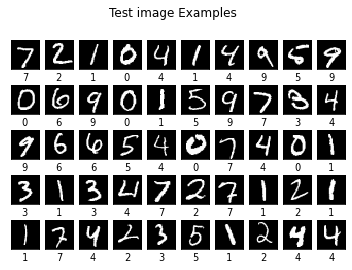

In [20]:
### Bounus 1: show the first ten images
### ALways a good idea to validate that the data appears as you expect
### 
### for sci-kit learn the images are represented as vectors of 784 elements
### currently scaled from 0 to 1

for i in range(50):
    l1_plot = plt.subplot(5, 10, i + 1)
    l1_plot.imshow(255 * X_test[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.gray)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    #l1_plot.set_xlabel('Class %s' % y_test[i].decode())
    l1_plot.set_xlabel('%i' % int(y_test[i]))
plt.suptitle('Test image Examples')
plt.show()

In [21]:
## for this demonstration each pixel scale is normalized 
## by the mean and standared deviation of the training set
## note the mean and stadard deviation are set by the
## taining set only.
## why is this done?
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#train and test classifier
# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / 1000,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
# Train the classifier
clf.fit(X_train, y_train)

#Evaluate the classifier
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
y_pred = clf.predict(X)

# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)
print("y_predicted_values", y_pred)
print("y_labels", y)

Sparsity with L1 penalty: 16.90%
Test score with L1 penalty: 0.8916
y_predicted_values [b'3' b'0' b'4' ... b'8' b'8' b'6']
y_labels [b'5' b'0' b'4' ... b'4' b'5' b'6']


In [13]:
## For analysis show also the confusion matrix

from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test)
cfm = confusion_matrix(y_test, y_predict)
print (cfm)

[[ 953    0    1    2    0    9   11    1    3    0]
 [   0 1103    3    3    1    2    4    0   19    0]
 [  16   21  869   22   18    1   20   23   39    3]
 [   5    6   21  894    1   30    7   18   20    8]
 [   2   10    4    0  901    2   13    2    4   44]
 [  14    8    5   44   22  727   21   14   24   13]
 [  16    9    8    0   11   18  891    1    4    0]
 [   1   35   17    5   12    0    1  915    1   41]
 [  10   30    9   29   20   37    9   17  796   17]
 [  18   10    4   12   53    5    0   32    3  872]]


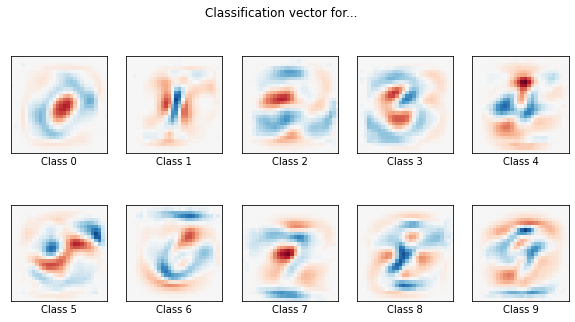

In [14]:
# Bonus 2: Visualization of the weights
# This is only possible for simple classifiers

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')
plt.show()

In [15]:
### Bonus 3: comfusion matrix visualization tool
## A more elegant preserntation for a confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization


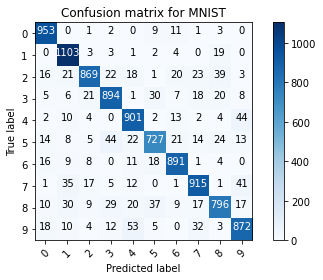

In [16]:
plot_confusion_matrix(cfm, classes=range(10), 
                      title='Confusion matrix for MNIST')